# California Housing Data Analysis

## Problem Statement and Description

The Dataset is built using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The information was collected on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. Distances were computed among the centroids of each block group as measured in latitude and longitude and all the districts reporting zero entries for the independent and dependent variables were excluded. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value). The other variables are as follows:

### This report presents the univariate and multivariate analysis of the variables in this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calhousing_data = pd.read_csv('https://raw.githubusercontent.com/decodrtechnologies/Data-Science/master/California%20Housing%20Prices/housing.csv')

In [3]:
calhousing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Attribute Description

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

## Basic exploration of the dataset

In [4]:
calhousing_data.shape

(20640, 10)

Our Datset has 20640 rows and 10 columns. Each row represents a data point pertaining to a census block group and each column represent one of the 10 attributes mentioned above.

In [5]:
#Checking the data types of each attribute
calhousing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


9 out of our 10 attributes including the dependent variable is numerical and ocean_proximity is categorical in nature.

In [6]:
calhousing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The attribute total_bedrooms has 207 datapoints missing. All the other attributed do not have any missing values.

## Descriptive statistics summary of the variables in our dataset.

In [7]:
calhousing_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640,NaN,NaN,NaN,-119.57,2.00353,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640,NaN,NaN,NaN,35.6319,2.13595,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640,NaN,NaN,NaN,28.6395,12.5856,1,18,29,37,52
total_rooms,20640,NaN,NaN,NaN,2635.76,2181.62,2,1447.75,2127,3148,39320
total_bedrooms,20433,NaN,NaN,NaN,537.871,421.385,1,296,435,647,6445
population,20640,NaN,NaN,NaN,1425.48,1132.46,3,787,1166,1725,35682
households,20640,NaN,NaN,NaN,499.54,382.33,1,280,409,605,6082
median_income,20640,NaN,NaN,NaN,3.87067,1.89982,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640,NaN,NaN,NaN,206856,115396,14999,119600,179700,264725,500001
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the summary statistics we can observe that:
1. The west most longitude value is -124.35 and the east most longitude value is -114.31. We are observing the housing over 
a distance equivalent of approximately 10 degrees between the east and the west.
2. The south most latitude value is 32.54 and the northmost latitude value is 41.95. We are observing the housing over a distance equivalent of approximately 9 degrees between the north and the south.
3. The average age of the median age within a block variable is 28.6395.
4. Block sizes are of varying nature as the number of rooms in each block range from 2 to 39320. This is a very broadly distributed variable with a high range.
5. Total bedrooms complement the fact that block sizes are varying in nature and range from 1 bedroom to 6445 bedrooms.
6. The median population of all the blocks is 1166, and the population of blocks range from 3 to 35682.
7. The minimum number of households is 1 and the maximum number of households in ablock is 6082.
8. Medium_income shows the various ranges of income earned by the people in the block.
9. Most of the houses are less than an hour's drive from the ocean.

# Univariate Analysis

## longitude

In [8]:
calhousing_data['longitude'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31


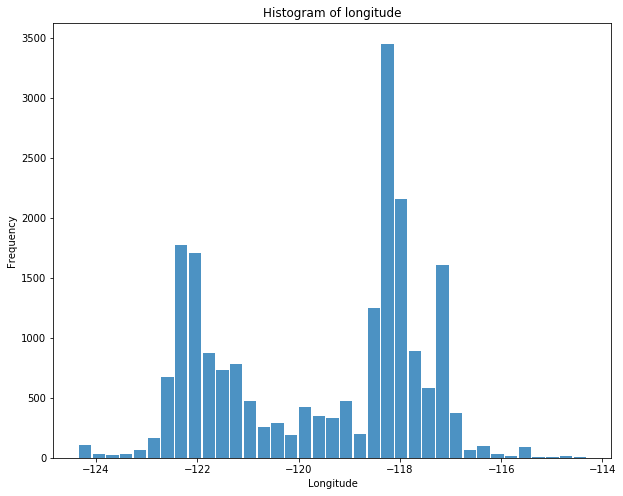

In [9]:
plt.figure(figsize=(10,8))
plt.hist(x=calhousing_data.longitude,bins='auto',alpha=0.8,rwidth=0.9)
plt.title('Histogram of longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

This histogram indicates 2 regions of high frequencies. There are a high number of blocks around -118.5 and 117 
degree longitudes and around -123 and -121 degree longitudes. These 2 regions have a higher density of blocks where compared to 
other locations of longitude.

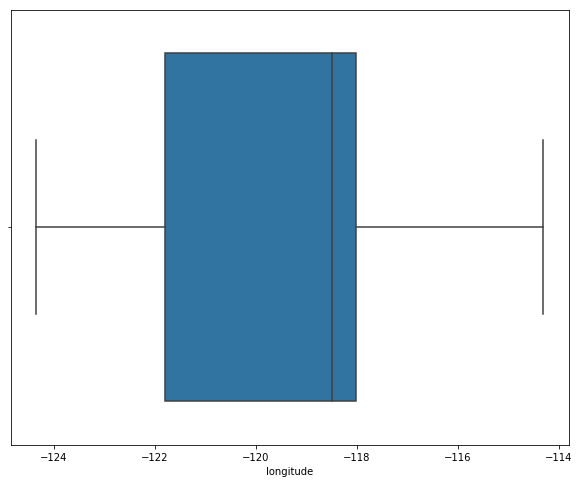

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(calhousing_data.longitude)
plt.show()

The middle 50% of the blocks reside between -118 and -122 degree longitude. This can be viewed as the centre of housing settlements 
in California with respect to longitude.

## latitude

In [11]:
calhousing_data['latitude'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
latitude,20640.0,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95


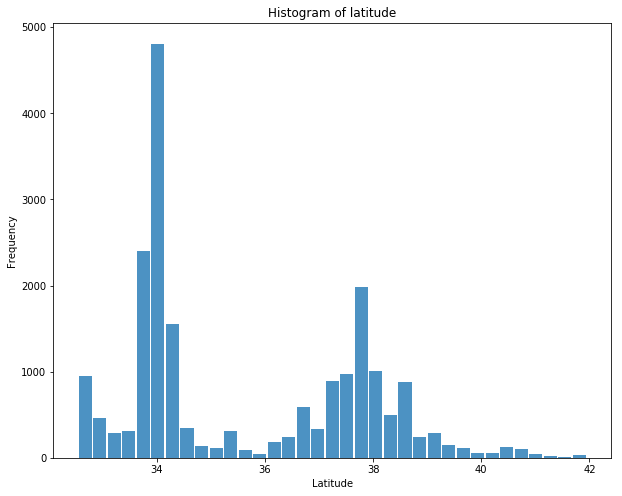

In [12]:
plt.figure(figsize=(10,8))
plt.hist(x=calhousing_data.latitude,bins='auto',alpha=0.8,rwidth=0.9)
plt.title('Histogram of latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

The regions surrounding 32 degrees latitude, the distribution around 34 degrees and the distribution 
around 38 degrees have a high number of blocks populated. In particular, 34 degree latitude seems to be a hotspot for housing as there
are close to 5000 blocks in this region. This could be because this is in the south of california where the weather might be warmer 
compared to northern parts.

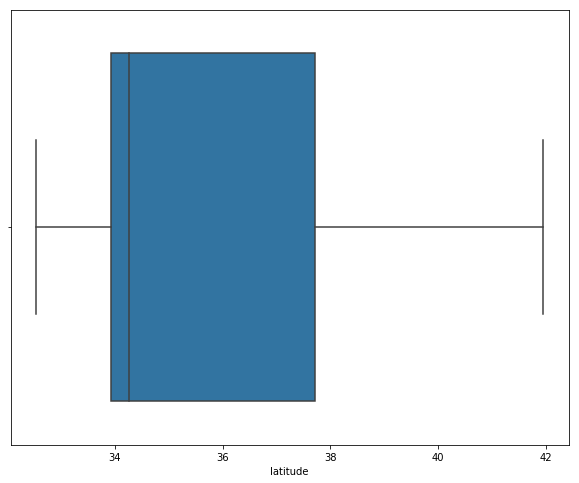

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(calhousing_data.latitude)
plt.show()

The central 50% of the distribution of houses lie in the range between 34 and 38 degree latitudes and the median latitude of blocks is close to 34.
We can again attribute this to the fact of climate and people preferences.

## housing_median_age

In [14]:
calhousing_data['housing_median_age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20640.0,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0


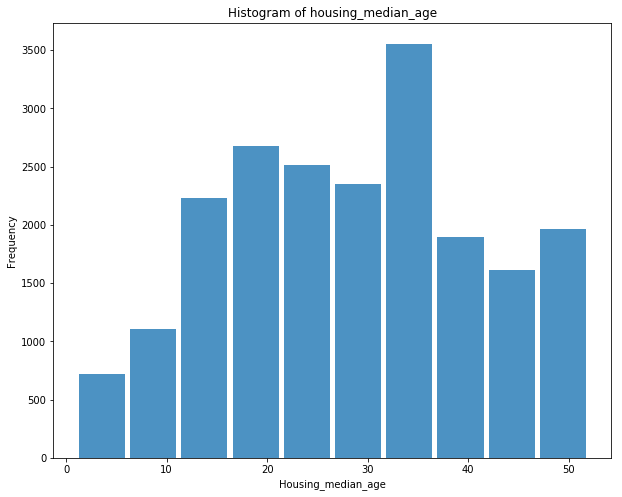

In [15]:
plt.figure(figsize=(10,8))
plt.hist(x=calhousing_data.housing_median_age,bins=10,alpha=0.8,rwidth=0.9)
plt.title('Histogram of housing_median_age')
plt.xlabel('Housing_median_age')
plt.ylabel('Frequency')
plt.show()

The maximum frequency of median houses of blocks are between 30 and 36 years. It cna be seen that a considerable number of houses are close to being 50 years old and there are fewer houses which are newly constructed.
The houses which are less than 10 years old are from blocks that are from newer areas of habitation. Naturally the number of blocks here would be lesser than traditional localities.

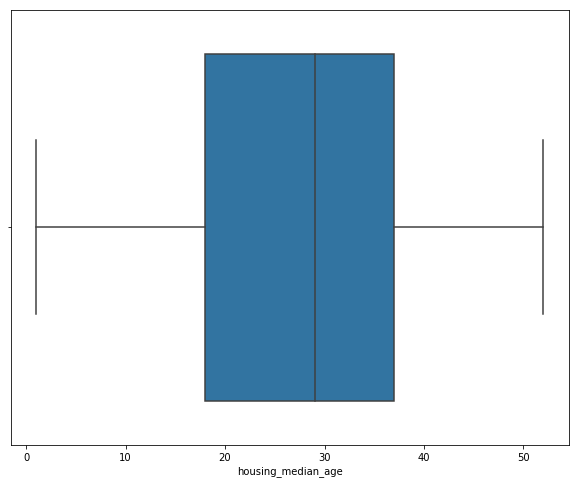

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(calhousing_data.housing_median_age)
plt.show()

The median housing age of all the blocks is approximately 28 years and the middle 50% of median age of blocks are between 18 and 37 years old.

## Population

In [17]:
calhousing_data['population'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
population,20640.0,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0


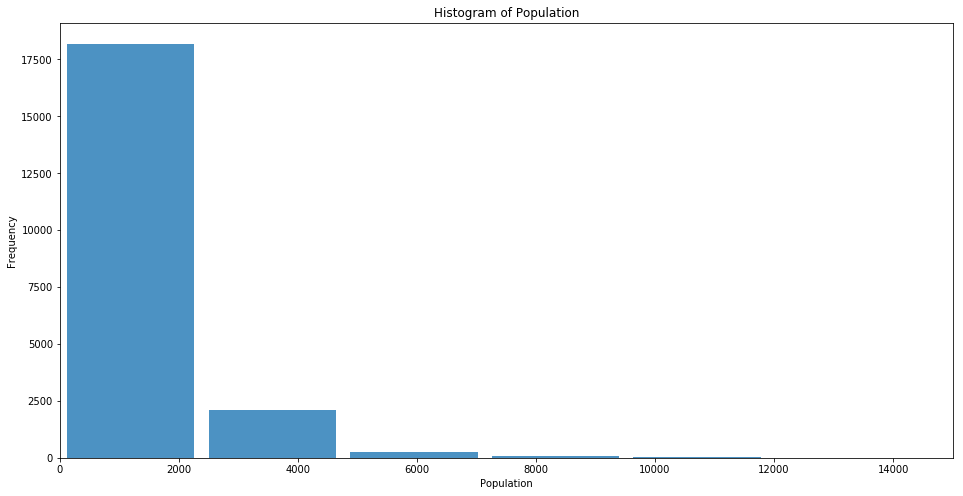

In [18]:
plt.figure(figsize=(16,8))
plt.hist(x=calhousing_data.population,bins=15,alpha=0.8,rwidth=0.9)
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.xlim(3,15000)
plt.show()

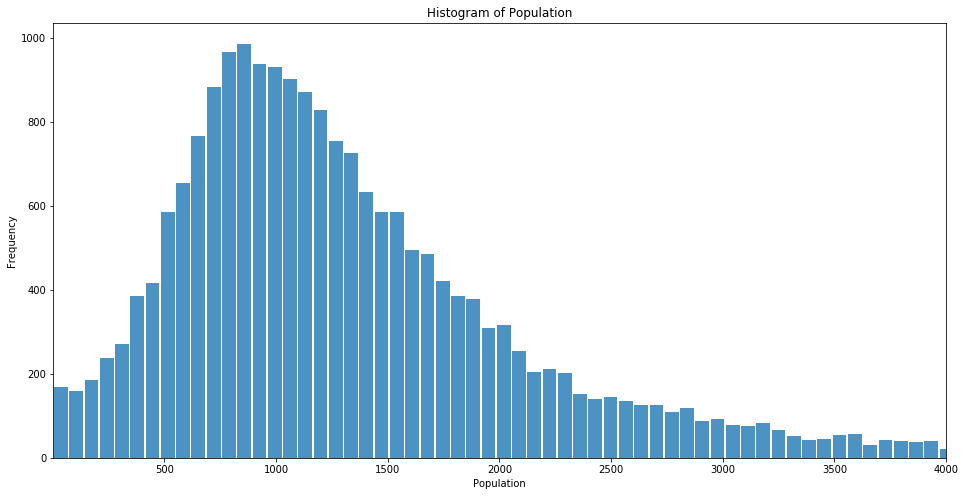

In [19]:
plt.figure(figsize=(16,8))
plt.hist(x=calhousing_data.population,bins='auto',alpha=0.8,rwidth=0.9)
plt.title('Histogram of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.xlim(3,4000)
plt.show()

The distribution of population is very skewed to the right. Most of the blocks have a population between 500 and 1500. The range of population is too large with a few values in between from values greater than 4000. So i have tried to analyse the distribution by limiting the population under 4000.

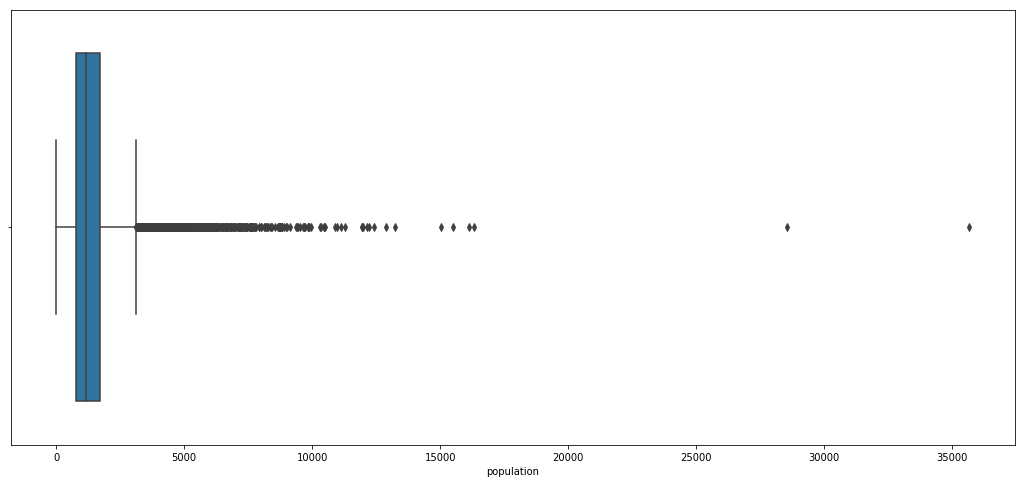

In [20]:
plt.figure(figsize=(18,8))
sns.boxplot(calhousing_data.population)
plt.show()

There are many outliers and few blocks which have a considerable difference in pouplation from the median value.

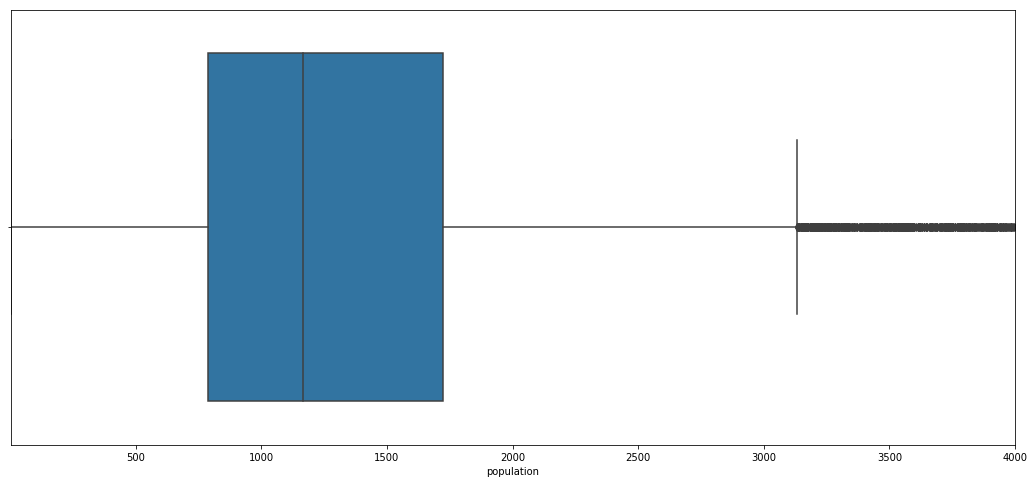

In [21]:
plt.figure(figsize=(18,8))
sns.boxplot(calhousing_data.population)
plt.xlim(3,4000)
plt.show()

The median population of the blocks is around 1200.

## Median Income

In [22]:
calhousing_data['median_income'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001


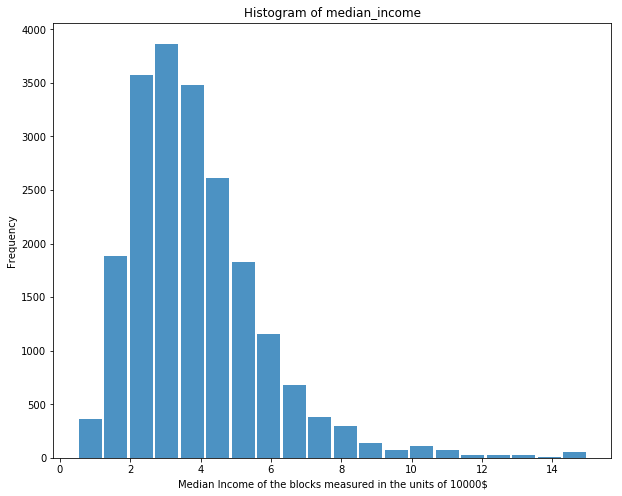

In [23]:
plt.figure(figsize=(10,8))
plt.hist(x=calhousing_data.median_income,bins=20,alpha=0.8,rwidth=0.9)
plt.title('Histogram of median_income')
plt.xlabel('Median Income of the blocks measured in the units of 10000$')
plt.ylabel('Frequency')
plt.show()

The distribution exhibits positive skewness. Most of the blocks earn an income in the range of 20000 dollars to 40000 dollars  an annum. Few blocks are havaing greater than 80000$ median income.
These blocks might have businessmen, celebrities and other job roles which offer a good amount of money.

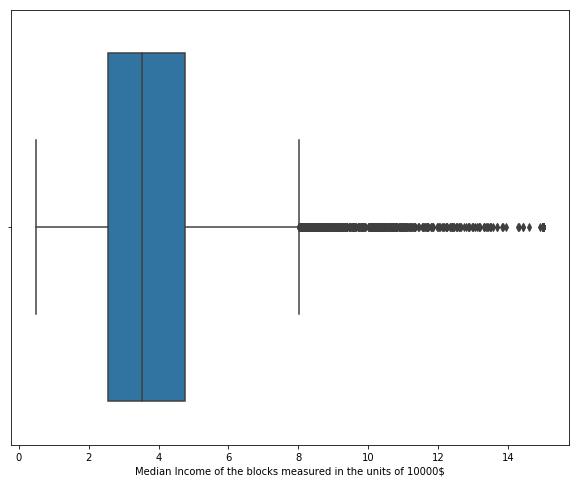

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(calhousing_data.median_income)
plt.xlabel('Median Income of the blocks measured in the units of 10000$')
plt.show()

we can see that there are outliers who earn much more than the rest of the families. The middle 50% of the median household incomes lie in the range between 25000 dollars and 450000 dollars.

## Ocean Proximity

In [25]:
calhousing_data['ocean_proximity'].describe().to_frame().T

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


There are 5 different types of blocks with respect to distance from the ocean. Most of the blocks are less than an hour from the beach.

In [26]:
calhousing_data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

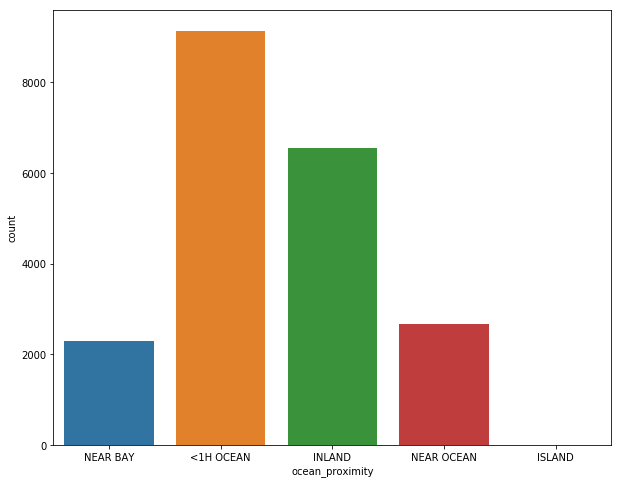

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(calhousing_data.ocean_proximity)
plt.show()

# Bivariate Analysis

## latitude vs longitude

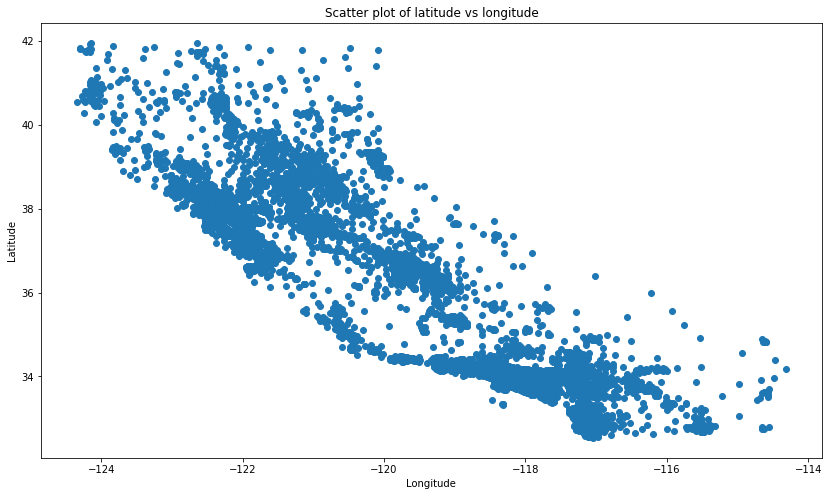

In [28]:
plt.figure(figsize=(14,8))
plt.scatter(x=calhousing_data['longitude'],y=calhousing_data['latitude'])
plt.title('Scatter plot of latitude vs longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatter plot shows the layout the blocks geographically. The central and southern areas are densely populated especially towards the west. This could be because people living near the beach and can enjoy some benifits of coastal climate. Central zones could also have downtowns and establishments hence some central areas are heavily populated as well.

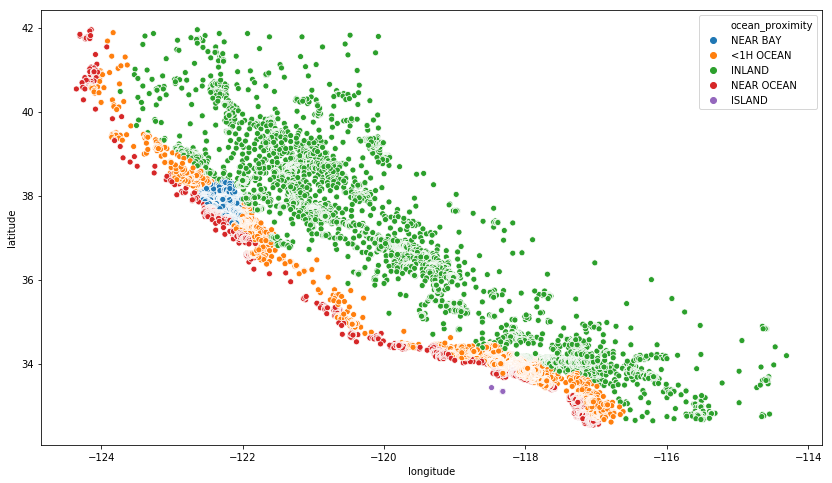

In [29]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude',y='latitude',hue='ocean_proximity',data=calhousing_data)
plt.show()

Plot of latitude and longitude with respect to ocean proximity. The shape of the coastal region starts to move increasingly westward as we move from south to the north. The points highlighted in blue show a densely populated region where many IT companies reside and hence it is populated by a lot of workers working there.

## Median Housing age vs Median House value

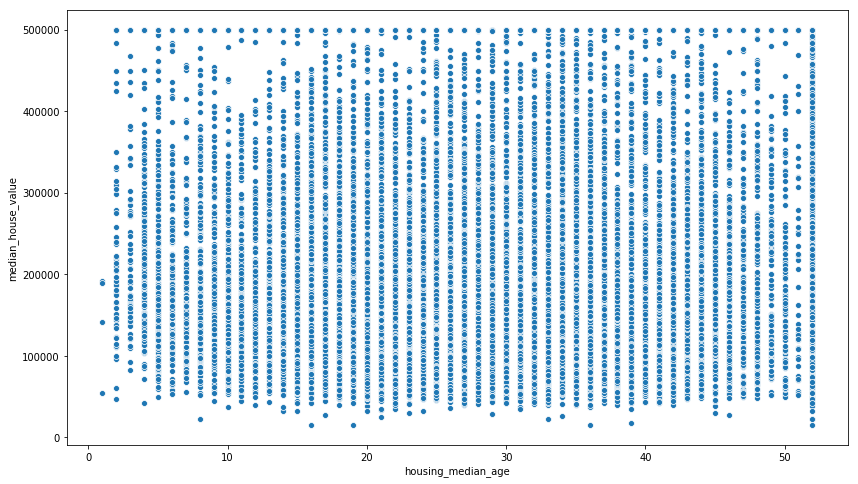

In [30]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=calhousing_data['housing_median_age'],y=calhousing_data['median_house_value'])
plt.show()

In [31]:
calhousing_data['housing_median_age'].corr(calhousing_data['median_house_value'])

0.10562341249320999

By intuition newer houses tend to be more expensive than older ones. However, other factors such as area, developments, proximity to work, climate and many other factors determine the value of house price.
The graph does not seem to show any discernible patterns. The correlation between age and house price also complements the above statement as it is a very weak correlation.

### Analysis of Attributes with respect to location and House price

## Ocean_proximity vs house_price

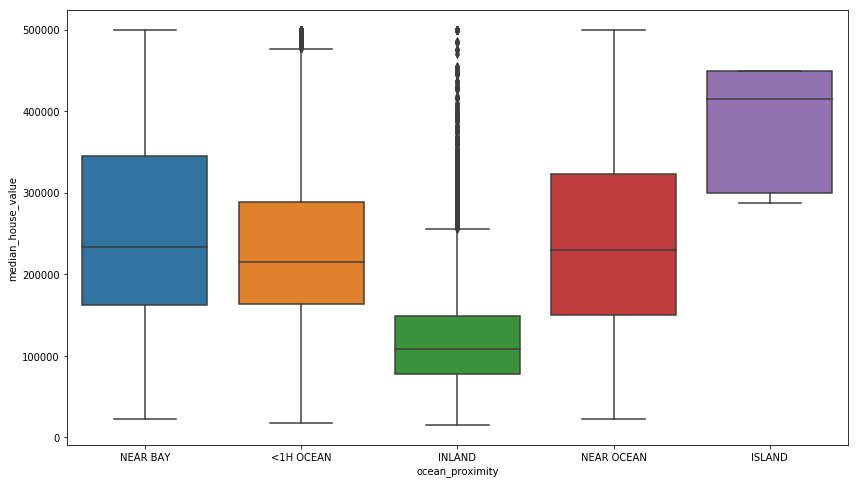

In [32]:
plt.figure(figsize=(14,8))
sns.boxplot(x=calhousing_data['ocean_proximity'],y=calhousing_data['median_house_value'])
plt.show()

It can be seen in general that island houses are the most expensive while inland houses are the cheaper houses. The houses near bay area and near the ocean are a little more expensive than the houses that are 1 hour away from the ocean.
We can clearly see that ocean proximity has an effect on the house prices.

## longitude vs house price

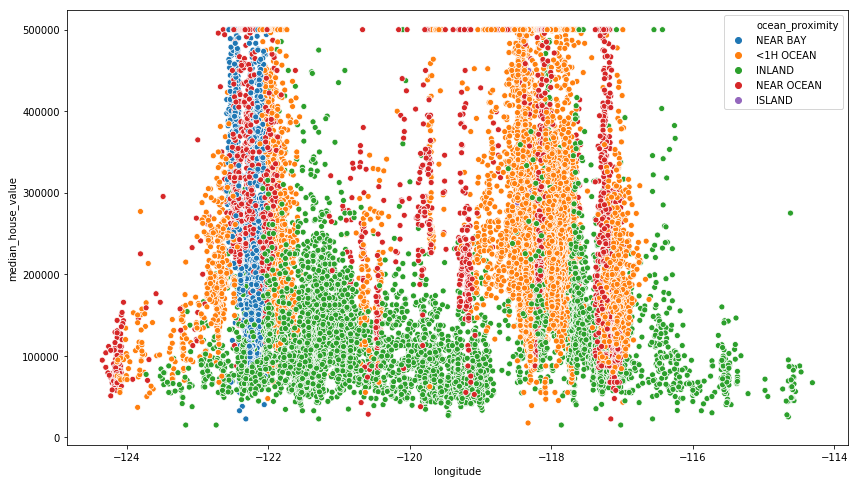

In [33]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=calhousing_data['longitude'],y=calhousing_data['median_house_value'],hue=calhousing_data['ocean_proximity'])
plt.show()

We can observe that house prices in general tend to increase as we tend to move towards the west. 

## latitude vs house price

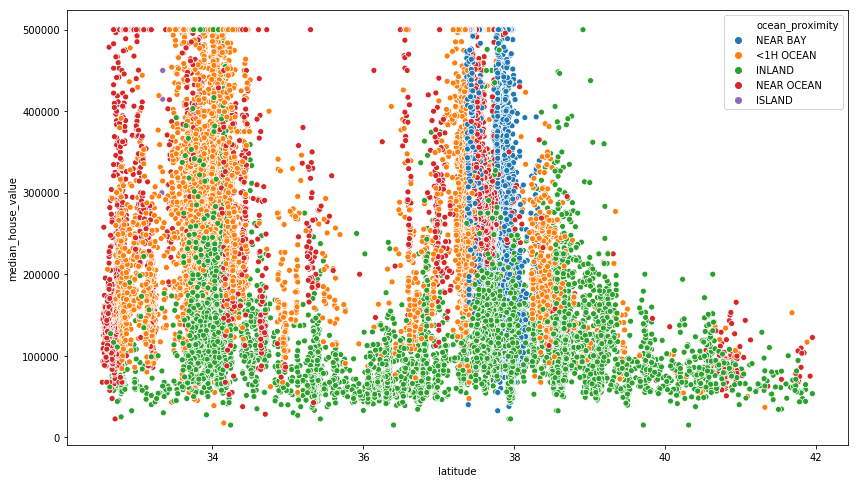

In [34]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=calhousing_data['latitude'],y=calhousing_data['median_house_value'],hue=calhousing_data['ocean_proximity'])
plt.show()

As we go north the price of houses tend to decrease in general. However the bay area is close to the north. Therefore could account for higher median house prices there.

## Population vs house price

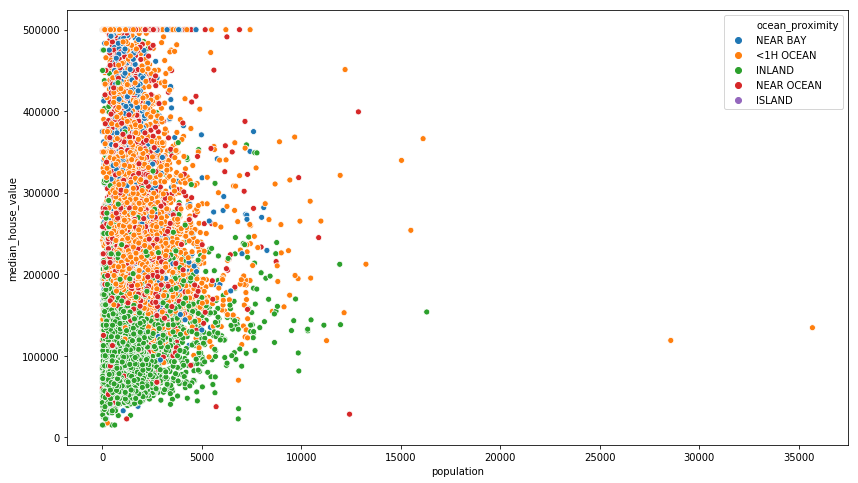

In [35]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=calhousing_data['population'],y=calhousing_data['median_house_value'],hue=calhousing_data['ocean_proximity'])
plt.show()

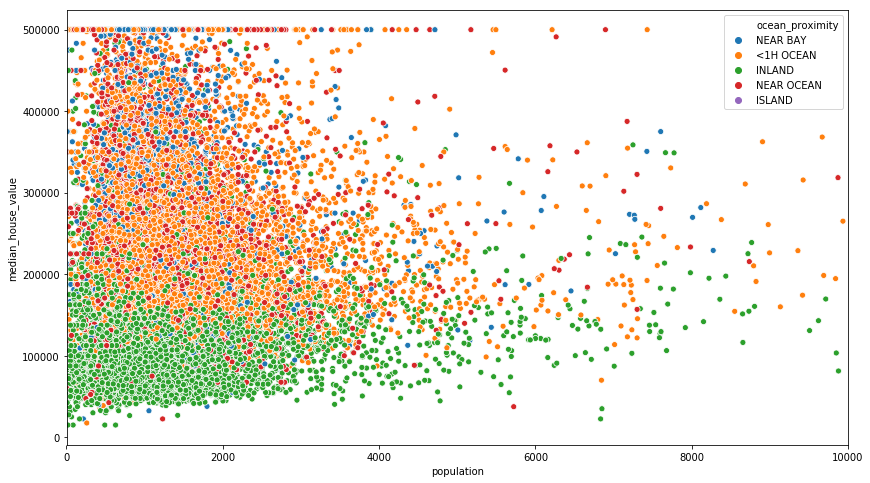

In [36]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=calhousing_data['population'],y=calhousing_data['median_house_value'],hue=calhousing_data['ocean_proximity'])
plt.xlim(3,10000)
plt.show()

It can be seen that most of the highly populated areas are inland. Areas where population is less and are closer to the ocean or bay are have higher house prices. As the population range is varied and has outliers i have scaled down th limits of population to a max of 10000 per block. In general houses near the bay area are also expensive irrespective of the population of the blocks.

## Income vs house price and proximity

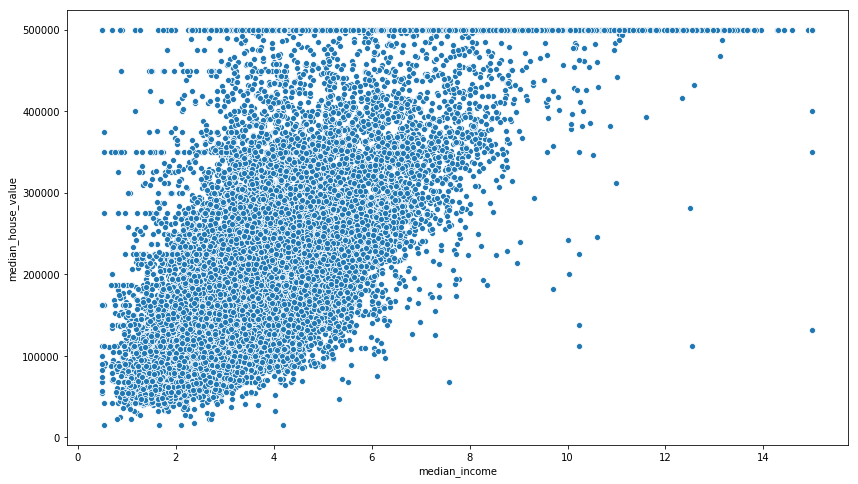

In [37]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=calhousing_data['median_income'],y=calhousing_data['median_house_value'])
plt.show()

In [38]:
calhousing_data['median_income'].corr(calhousing_data['median_house_value'])

0.6880752079585484

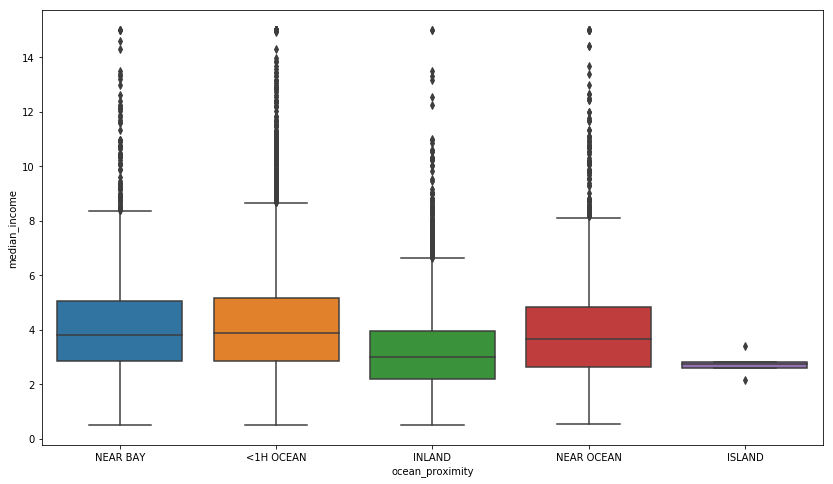

In [39]:
plt.figure(figsize=(14,8))
sns.boxplot(x=calhousing_data['ocean_proximity'],y=calhousing_data['median_income'])
plt.show()

We can also clearly see a linear relationship between median income and value of the house. Additonally from the earlier analysis, the prices of houses in the bay area are generally expensive.
Thus we can say that people who earn a good income generally stay in more expensive houses. Moreover people who live closer to ocean generally tend to have a greater income that those who live inland as implied by the box plot above.